# TP Final Integrador Visión por Computadora II - CEIA - FIUBA - Cohorte 16

Alumnos: Fabricio Lopretto (a1616) y Santiago José Olaciregui (a1611)

## Generación de ploteos adicionales con los resultados de utilizar conjuntos de entrenamiento sin preprocesar sobre el clasificador de la red YOLO prouesta y con el *pipeline* de clasificación mediante CNN.

### Objetivos:

Generar y analizar las siguientes gráficas a partir de los resultados de la red generados al utilizar el conjunto de imagenes sin preprocesamiento sobre ambos clasificadores:

1. Pérdida de box vs épocas.
2. Pérdida de clases vs épocas.
3. Precisión y Recall vs épocas.


### Características:

En los casos de funciones de pérdida, se muestran tanto los cálculos utilizando el conjunto de entrenamiento como de validación. Mientras que en el caso de las métricas se utilizó solo el conjunto de validación como es de esperar.

Además de mostrarse los resultados para el clasificador de la red YOLO, se muestran los propios para el *pipeline* clasificador CNN sin optimizar y con hiperparámetros optimizados. Los hiperparámetros optimizados son los definidos en la notebook *Busqueda_Hiperparametros_YOLO_Clasificador.* 

In [1]:
# Importa las librerías necesarias
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
# Ruta notebook
file_notebok = os.getcwd()

Carga de métricas clasificador Red YOLO

In [3]:
# Nombre del archivo sin preprocesamiento
file_name_yolo = "artefactos/RGB/train_results/results.csv"
# Ruta al archivo sin preprocesamiento
file_path_yolo = os.path.join(file_notebok, file_name_yolo)

In [4]:
# Carga el archivo sin preprocesamiento en un DataFrame
df_yolo = pd.read_csv(file_path_yolo)

# Muestra las primeras filas del DataFrame
df_yolo.head()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,89.9964,1.31778,3.03587,0.95514,0.63679,0.70870,0.71878,0.53318,0.92748,1.43541,0.86089,0.000175,0.000175,0.000175
1,2,178.7380,0.95931,1.30413,0.87330,0.94823,0.93354,0.98082,0.76143,0.83769,0.67863,0.84037,0.000343,0.000343,0.000343
2,3,260.8320,0.86568,0.93918,0.85538,0.96653,0.96764,0.99052,0.80720,0.69971,0.55491,0.81630,0.000505,0.000505,0.000505
3,4,344.9830,0.81343,0.78831,0.84500,0.98300,0.98614,0.99212,0.83259,0.64712,0.47860,0.81074,0.000495,0.000495,0.000495
4,5,429.8730,0.76730,0.70097,0.83671,0.97849,0.98500,0.98833,0.84160,0.60598,0.44011,0.80236,0.000484,0.000484,0.000484


Carga de métricas clasificador *Pipeline* Red CNN (sin optimizar hiperparámetros)

In [5]:
# Nombre del archivo metricas pipeline clasificador sin optimizar
file_name_pipeline = "artefactos/RGB/train_results/CNN_Classifier.xlsx"
# Ruta al archivo sin preprocesamiento
file_path_pipeline = os.path.join(file_notebok, file_name_pipeline)

In [6]:
"""
Se utilizaron hiperpaámetros por defecto:

num_epochs = 10
learning_rate = 0.001
batch_size = 64
drop_out = 0.5
kernel_size = 3
"""
# Carga el archivo metricas pipeline clasificador sin optimizar en un DataFrame
df_pipeline = pd.read_excel(file_path_pipeline, sheet_name='sin_opt_hip')

# Muestra las primeras filas del DataFrame
df_pipeline.head()

,epoch,train_loss,val_loss,val_precision,val_recall
0,1,0.6446,0.4775,0.8361,0.83220
1,2,0.4599,0.4397,0.8695,0.86503
2,3,0.4278,0.4248,0.8606,0.86020
3,4,0.4055,0.4252,0.8658,0.86470
4,5,0.3840,0.4203,0.8684,0.86040


Carga de métricas clasificador *Pipeline* Red CNN (con hiperparámetros optimizados)

In [7]:
# Nombre del archivo metricas pipeline clasificador optimizado
file_name_pipeline = "artefactos/RGB/train_results/CNN_Classifier.xlsx"
# Ruta al archivo sin preprocesamiento
file_path_pipeline = os.path.join(file_notebok, file_name_pipeline)

In [8]:
"""
Se utilizaron hiperpaámetros por defecto:

num_epochs = 10
learning_rate = 0.001
batch_size = 64
drop_out = 0.3
kernel_size = 5
"""
# Carga el archivo metricas pipeline clasificador optimizado en un DataFrame
df_pipeline_opt = pd.read_excel(file_path_pipeline, sheet_name='con_opt_hip')

# Muestra las primeras filas del DataFrame
df_pipeline_opt.head()

,epoch,train_loss,val_loss,val_precision,val_recall
0,1,0.1543,0.0146,0.9978,0.9978
1,2,0.0147,0.0203,0.9960,0.9960
2,3,0.0102,0.0144,0.9971,0.9971
3,4,0.1240,0.0671,0.9914,0.9914
4,5,0.0205,0.0219,0.9960,0.9960


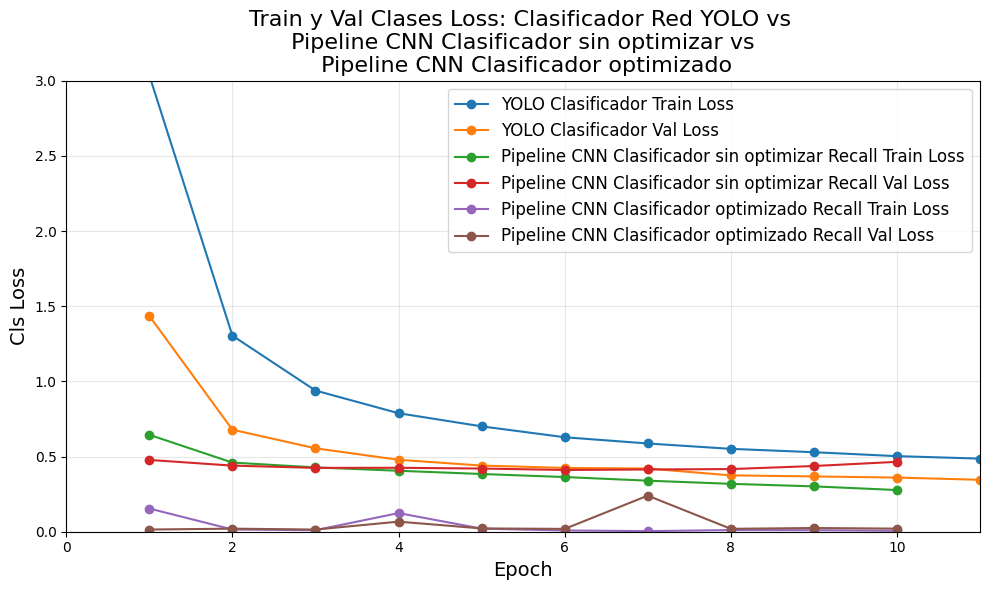

In [9]:
# PÉRDIDA DE CLASE RGB
# Crea el gráfico
plt.figure(figsize=(10, 6))
# Grafica las curvas clasificdor YOLO
plt.plot(df_yolo["epoch"], df_yolo["train/cls_loss"], label="YOLO Clasificador Train Loss", marker='o')
plt.plot(df_yolo["epoch"], df_yolo["val/cls_loss"], label="YOLO Clasificador Val Loss", marker='o')
# Grafica las curvas clasificdor CNN sin optimizar
plt.plot(df_pipeline["epoch"], df_pipeline["train_loss"], label="Pipeline CNN Clasificador sin optimizar Recall Train Loss", marker='o')
plt.plot(df_pipeline["epoch"], df_pipeline["val_loss"], label="Pipeline CNN Clasificador sin optimizar Recall Val Loss", marker='o')
# Grafica las curvas clasificdor CNN con hiperparámetros optimizados
plt.plot(df_pipeline_opt["epoch"], df_pipeline_opt["train_loss"], label="Pipeline CNN Clasificador optimizado Recall Train Loss", marker='o')
plt.plot(df_pipeline_opt["epoch"], df_pipeline_opt["val_loss"], label="Pipeline CNN Clasificador optimizado Recall Val Loss", marker='o')
# Añade título y etiquetas
plt.title("Train y Val Clases Loss: Clasificador Red YOLO vs \n Pipeline CNN Clasificador sin optimizar vs \n Pipeline CNN Clasificador optimizado", fontsize=16)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Cls Loss", fontsize=14)
# Define rangos
plt.xlim(0, 11)
plt.ylim(0, 3.0)
# Añade leyenda
plt.legend(fontsize=12)
# Muestra el gráfico
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

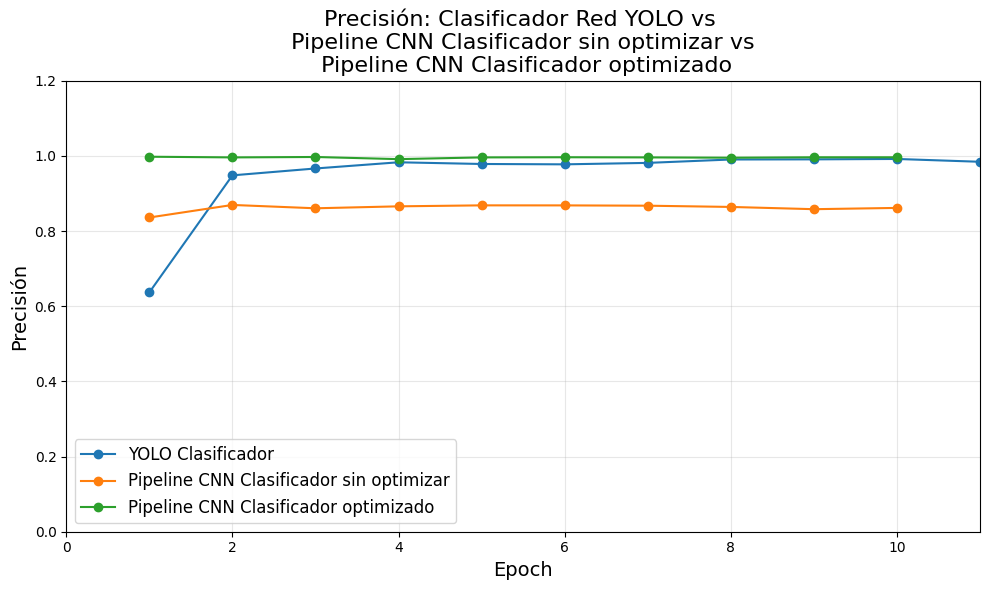

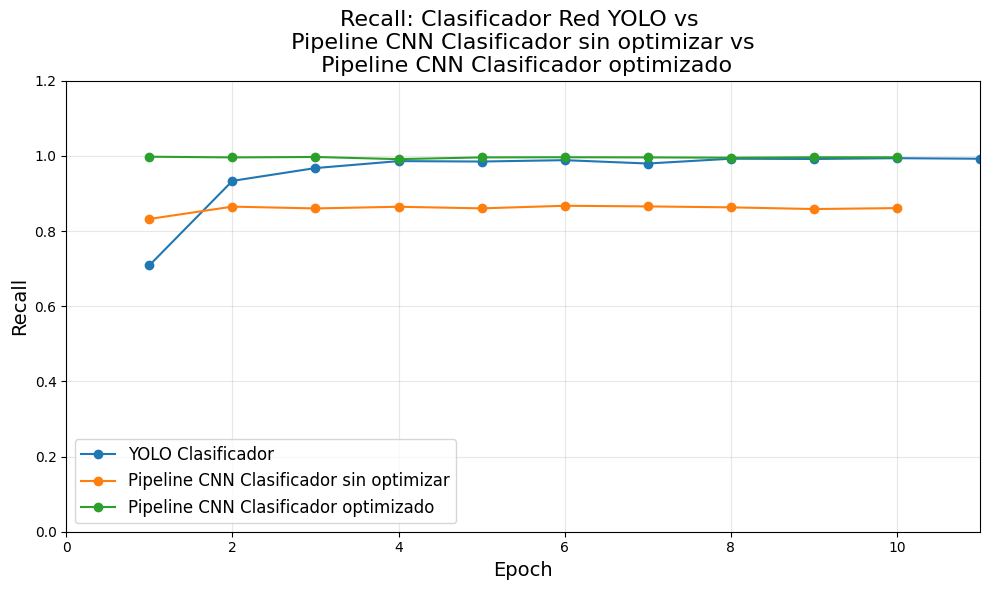

In [10]:
# PRECISION
# Crea el gráfico
plt.figure(figsize=(10, 6))
# Grafica la curva clasificdor YOLO
plt.plot(df_yolo["epoch"], df_yolo["metrics/precision(B)"], label="YOLO Clasificador", marker='o')
# Grafica la curva clasificdor CNN sin optimizar
plt.plot(df_pipeline["epoch"], df_pipeline["val_precision"], label="Pipeline CNN Clasificador sin optimizar", marker='o')
# Grafica la curva clasificdor CNN con hiperparámetros optimizados
plt.plot(df_pipeline_opt["epoch"], df_pipeline_opt["val_precision"], label="Pipeline CNN Clasificador optimizado", marker='o')
# Añade título y etiquetas
plt.title("Precisión: Clasificador Red YOLO vs \n Pipeline CNN Clasificador sin optimizar vs \n Pipeline CNN Clasificador optimizado", fontsize=16)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Precisión", fontsize=14)
# Define rangos
plt.xlim(0, 11)
plt.ylim(0, 1.2)
# Añade leyenda
plt.legend(fontsize=12)
# Muestra el gráfico
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# RECALL
plt.figure(figsize=(10, 6))
# Grafica la curva clasificdor YOLO
plt.plot(df_yolo["epoch"], df_yolo["metrics/recall(B)"], label="YOLO Clasificador", marker='o')
# Grafica la curva clasificdor CNN sin optimizar
plt.plot(df_pipeline["epoch"], df_pipeline["val_recall"], label="Pipeline CNN Clasificador sin optimizar", marker='o')
# Grafica la curva clasificdor CNN con hiperparámetros optimizados
plt.plot(df_pipeline_opt["epoch"], df_pipeline_opt["val_recall"], label="Pipeline CNN Clasificador optimizado", marker='o')
# Añade título y etiquetas
plt.title("Recall: Clasificador Red YOLO vs \n Pipeline CNN Clasificador sin optimizar vs \n Pipeline CNN Clasificador optimizado", fontsize=16)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Recall", fontsize=14)
# Define rangos
plt.xlim(0, 11)
plt.ylim(0, 1.2)
# Añade leyenda
plt.legend(fontsize=12)
# Muestra el gráfico
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Observaciones:

En la gráfica de pérdida se ve que el clasificador de la red YOLO tiene un ben desempeño (como se observó en la notebook YOLO+RGB).

En cuanto al pipeline clasificador CNN sin optimizar, si bien las pérdidas arrojaron valores menores al caso anterior, se nota como la pérdida de validación comienza a aumentar (alejándose de la de entrenamiento), denotando señal de sobreajuste.

Por otro lado, las curvas de pérdida del pipeline clasificador CNN optimizado presentó los menores valores de pérdida, tanto en la curva de entrenamiento como de validación). Además, estas convergen al mismo valor de pérdida sin identificarse una señal de subajuste o sobreajuste.

En cuanto a las curvas de precisión y recall, el pipeline clasificador CNN optimizado mostró los mejores resultados, seguido del clasificador de la red YOLO en segundo lugar, y el pipeline clasificador CNN sin optimizar tuvo el menor desempeño. No obstante, en los tres casos la métrica estuvo por encima del 80%, lo cual es a priori un buen resultado.

Por otro lado, llamó la atención la baja variación de las métricas en el caso del pipeline clasificador CNN (con y sin optimizar). Además, en el caso optimizado, la precisión y el recall arrojaron valores idénticos.